<a href="https://colab.research.google.com/github/Thanatipz/BSC_DPDM23/blob/main/Project_MLR_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



# เชื่อมต่อกับ Google Drive
drive.mount('/content/drive')

# ระบุตำแหน่งของไฟล์ใน Google Drive
file_path = '/content/drive/MyDrive/project 68/spi1234_results.xlsx'  # เปลี่ยนเป็นเส้นทางไฟล์ของคุณ

# อ่านข้อมูลจากไฟล์ Excel
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TDEW               20 non-null     float64
 1   RH2M               20 non-null     float64
 2   RAIN               20 non-null     float64
 3   WIND               20 non-null     float64
 4   SPI 35 Days        20 non-null     float64
 5   SPI 15 Days        20 non-null     float64
 6   SPI 20 Days (1)    20 non-null     float64
 7   SPI 20 Days (2)    20 non-null     float64
 8   SPI Total          20 non-null     float64
 9   LAI 35 DAYS        20 non-null     float64
 10  LAI 50 DAY         20 non-null     float64
 11  LAI 70 DAYS        20 non-null     float64
 12  LAI 90 DAY         20 non-null     float64
 13  LAI TOTAL          20 non-null     float64
 14  YIELD(Mt per Day)  20 non-null     float64
dtypes: float64(15)
memory usage: 2.5 KB
None
            TDEW       RH2M       R

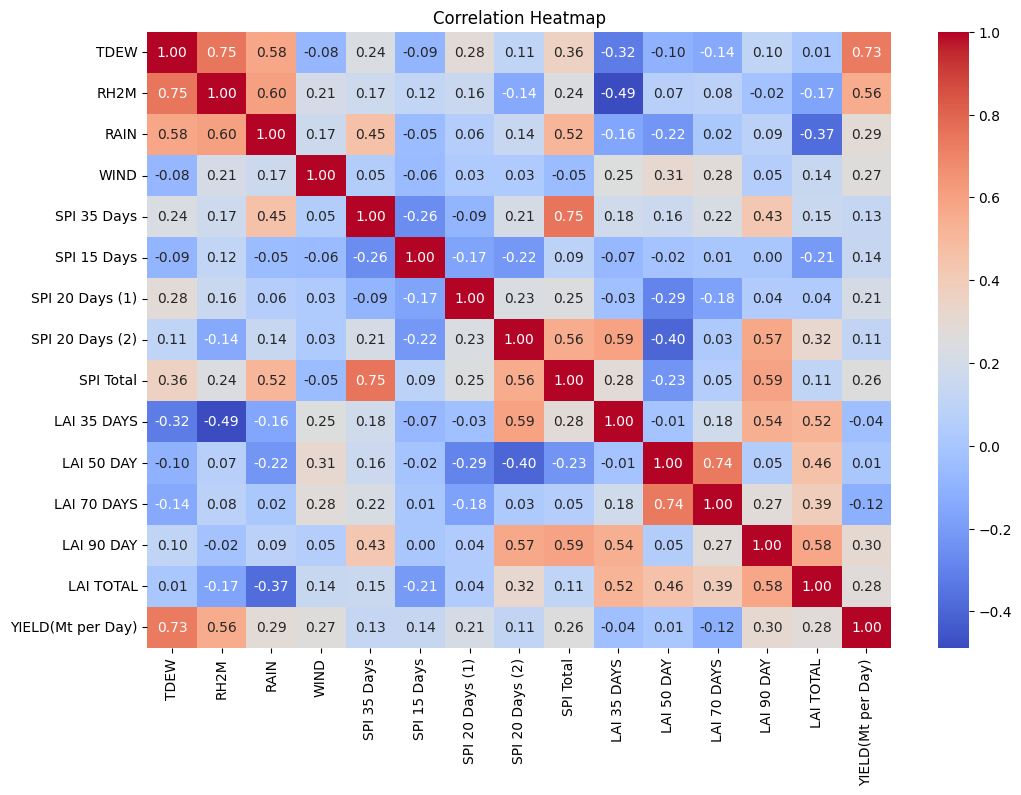

MAE: 279.7265
MSE: 83353.9591
RMSE: 288.7109
R² Score: 0.4796


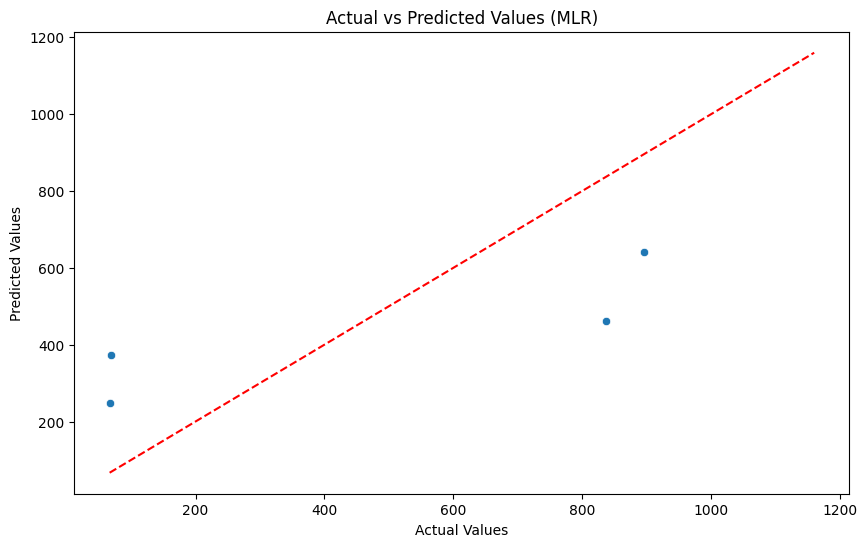

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------

# ลบ 2 คอลัมน์แรกที่ไม่ใช้
df = df.iloc[:, 2:]

# แยกตัวแปรอิสระ (X) และตัวแปรตาม (y)
X = df.iloc[:, 2:-1]  # คอลัมน์ที่ 4 ถึงคอลัมน์รองสุดท้าย
y = df.iloc[:, -1]   # คอลัมน์สุดท้าย

# ตรวจสอบค่าข้อมูลเบื้องต้น
print(df.info())
print(df.describe())

# ตรวจสอบค่า Missing Values
print(df.isnull().sum())

# ตรวจสอบความสัมพันธ์ระหว่างตัวแปร
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# แบ่งข้อมูลเป็น Train 80% และ Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Multiple Linear Regression
mlr = LinearRegression()

# ฝึกโมเดล
mlr.fit(X_train, y_train)

# ทำนายผล
y_pred_mlr = mlr.predict(X_test)

# คำนวณค่า MAE, MSE, RMSE, และ R² Score
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

# แสดงผลลัพธ์
print(f"MAE: {mae_mlr:.4f}")
print(f"MSE: {mse_mlr:.4f}")
print(f"RMSE: {rmse_mlr:.4f}")
print(f"R² Score: {r2_mlr:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_mlr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (MLR)")
plt.show()


### หาตัวแปรที่สัมพันธ์กับ Y

In [22]:
# คำนวณค่า Correlation Matrix ใหม่
correlation_matrix = df.corr()
# เลือกเฉพาะตัวแปรที่สัมพันธ์กับ y มากที่สุด
cor_target = correlation_matrix.iloc[:, -1].abs()  # คอลัมน์สุดท้ายคือ y
selected_features = cor_target[cor_target > 0.3].index  # ตัวแปรที่สัมพันธ์สูงกว่า 0.3

# กรองเฉพาะตัวแปรที่เลือก
df_selected = df[selected_features]
X = df_selected.iloc[:, :-1]  # ตัวแปรอิสระ
y = df_selected.iloc[:, -1]   # ตัวแปรตาม


In [23]:
# คำนวณความสัมพันธ์ของตัวแปรอิสระกับตัวแปรตาม (y)
cor_target = correlation_matrix.iloc[:, -1].abs()  # ใช้ค่า absolute

# เลือกเฉพาะตัวแปรที่มีค่าสัมพันธ์สูงกว่า 0.3
selected_features = cor_target[cor_target > 0.3].index

# กรองเฉพาะตัวแปรที่เลือก
df_selected = df[selected_features]
X = df_selected.iloc[:, :-1]  # ตัวแปรอิสระ
y = df_selected.iloc[:, -1]   # ตัวแปรตาม


In [24]:
# เลือกเฉพาะคอลัมน์สุดท้ายที่เป็นตัวแปรตาม (y)
cor_target = correlation_matrix.iloc[:, -1]

# กรองเฉพาะตัวแปรที่มีค่าสัมพันธ์สูงกว่า 0.3 (หรือ -0.3)
high_corr_features = cor_target[abs(cor_target) > 0.3]

# แสดงผล
print(" ตัวแปรที่มีความสัมพันธ์กับ y สูงกว่า 0.3 ")
print(high_corr_features)


 ตัวแปรที่มีความสัมพันธ์กับ y สูงกว่า 0.3 
TDEW                 0.727569
RH2M                 0.557849
LAI 90 DAY           0.304891
YIELD(Mt per Day)    1.000000
Name: YIELD(Mt per Day), dtype: float64


In [25]:
# ดึงคอลัมน์ที่สัมพันธ์สูง
selected_features = high_corr_features.index.tolist()

# กรองเฉพาะคอลัมน์ที่มีอยู่จริงใน DataFrame
selected_features = [col for col in selected_features if col in df.columns]

print("ตัวแปรที่ถูกเลือก:", selected_features)

# กรองข้อมูล
df_selected = df[selected_features]
X = df_selected.iloc[:, 2:-1]  # ตัวแปรอิสระ
y = df_selected.iloc[:, -1]   # ตัวแปรตาม


ตัวแปรที่ถูกเลือก: ['TDEW', 'RH2M', 'LAI 90 DAY', 'YIELD(Mt per Day)']


In [26]:
# ดึงชื่อคอลัมน์ที่มีความสัมพันธ์สูง
selected_features = high_corr_features.index.tolist()

# กรองเฉพาะตัวแปรที่เลือกมาใช้
df_selected = df[selected_features]

# แยกตัวแปรอิสระ (X) และตัวแปรตาม (y)
X = df_selected.iloc[:, :-1]
y = df_selected.iloc[:, -1]

print("ตัวแปรที่ถูกเลือกสำหรับใช้ในโมเดล:", X.columns.tolist())


ตัวแปรที่ถูกเลือกสำหรับใช้ในโมเดล: ['TDEW', 'RH2M', 'LAI 90 DAY']


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# จัดการค่า Missing (ใช้ค่าเฉลี่ยแทน)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# แบ่งข้อมูลเป็นชุด Train-Test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ปรับสเกลข้อมูลให้เป็นมาตรฐาน (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Multiple Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

# สร้างโมเดล MLR
mlr = LinearRegression()

# ฝึกโมเดลกับข้อมูลฝึก (Train)
mlr.fit(X_train_scaled, y_train)

# ทำนายผลลัพธ์ (Predict)
y_pred = mlr.predict(X_test_scaled)


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# คำนวณค่าความคลาดเคลื่อน
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# แสดงผล
print(f" Mean Absolute Error (MAE): {mae:.4f}")
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f" R² Score: {r2:.4f}")


 Mean Absolute Error (MAE): 203.7080
 Mean Squared Error (MSE): 51227.7919
 Root Mean Squared Error (RMSE): 226.3356
 R² Score: 0.6802


#### Random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

# สร้างโมเดล Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# ฝึกโมเดลกับข้อมูลฝึก
rf.fit(X_train_scaled, y_train)

# ทำนายผลลัพธ์
y_pred_rf = rf.predict(X_test_scaled)


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# คำนวณค่าความคลาดเคลื่อน
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# แสดงผล
print(f" Mean Absolute Error (MAE) for Random Forest: {mae_rf:.4f}")
print(f" Mean Squared Error (MSE) for Random Forest: {mse_rf:.4f}")
print(f" Root Mean Squared Error (RMSE) for Random Forest: {rmse_rf:.4f}")
print(f" R² Score for Random Forest: {r2_rf:.4f}")


 Mean Absolute Error (MAE) for Random Forest: 285.1897
 Mean Squared Error (MSE) for Random Forest: 84779.5123
 Root Mean Squared Error (RMSE) for Random Forest: 291.1692
 R² Score for Random Forest: 0.4707


In [33]:
from sklearn.model_selection import GridSearchCV

# พารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# สร้าง GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# ฝึกโมเดล
grid_search.fit(X_train_scaled, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print(f"🔍 Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
🔍 Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [34]:
# สร้าง Random Forest ด้วยพารามิเตอร์ที่ดีที่สุด
best_rf = grid_search.best_estimator_

# ฝึกโมเดล
best_rf.fit(X_train_scaled, y_train)

# ทำนายผลลัพธ์
y_pred_best_rf = best_rf.predict(X_test_scaled)

# คำนวณ R² ใหม่
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f" Best R² Score for Random Forest: {r2_best_rf:.4f}")


 Best R² Score for Random Forest: 0.7055


### เปรียบเทียบผลการทำนาย

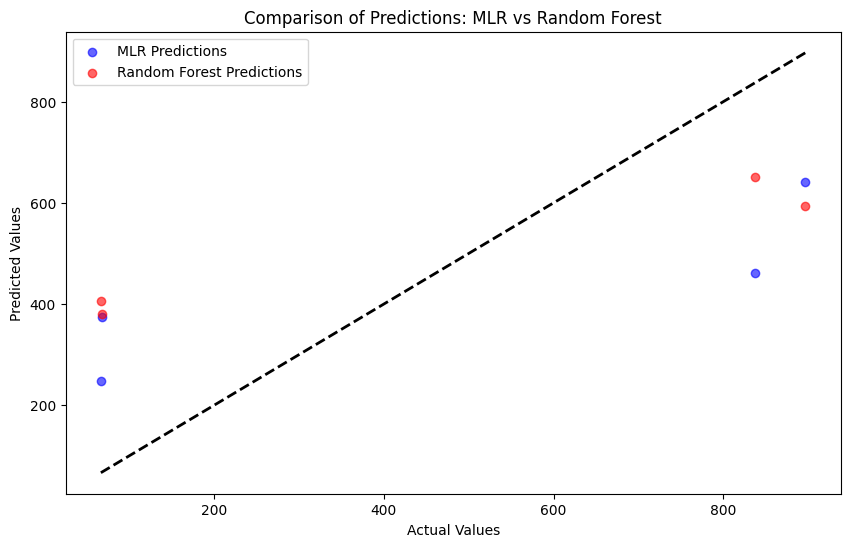

In [35]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบผลลัพธ์ที่ทำนายจากทั้งสองโมเดล
plt.figure(figsize=(10, 6))

# กราฟผลลัพธ์ที่ทำนายจาก MLR
plt.scatter(y_test, y_pred_mlr, color='blue', label='MLR Predictions', alpha=0.6)

# กราฟผลลัพธ์ที่ทำนายจาก Random Forest
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest Predictions', alpha=0.6)

# กราฟเส้น y = x (ผลลัพธ์ที่ทำนาย = ผลจริง)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', lw=2)

# การตั้งค่ากราฟ
plt.title("Comparison of Predictions: MLR vs Random Forest")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend(loc="upper left")

# แสดงกราฟ
plt.show()


### Support Vector Machine

In [40]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# สร้างโมเดล SVM Regressor
svm = SVR(kernel='rbf')  # ใช้ kernel แบบ RBF (Radial Basis Function)

# สเกลข้อมูลก่อนฝึกโมเดล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ฝึกโมเดล SVM
svm.fit(X_train_scaled, y_train)

# ทำนายผลลัพธ์
y_pred_svm = svm.predict(X_test_scaled)


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# คำนวณ MAE, MSE, RMSE, และ R² สำหรับ SVM
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# แสดงผล
print(f" Mean Absolute Error (MAE) for SVM: {mae_svm:.4f}")
print(f" Mean Squared Error (MSE) for SVM: {mse_svm:.4f}")
print(f" Root Mean Squared Error (RMSE) for SVM: {rmse_svm:.4f}")
print(f" R² Score for SVM: {r2_svm:.4f}")


 Mean Absolute Error (MAE) for SVM: 398.3045
 Mean Squared Error (MSE) for SVM: 181371.8855
 Root Mean Squared Error (RMSE) for SVM: 425.8778
 R² Score for SVM: -0.1322


In [46]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# สเกลข้อมูลก่อนการฝึกโมเดล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'C': [1, 10, 100],              # ค่าพารามิเตอร์ C
    'gamma': ['scale', 'auto'],     # ค่าพารามิเตอร์ gamma
    'kernel': ['rbf', 'linear']     # ประเภทของ kernel
}

# สร้าง GridSearchCV สำหรับการหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(SVR(), param_grid, cv=5, n_jobs=-1, verbose=2)

# ฝึกโมเดลโดยใช้ GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# แสดงพารามิเตอร์ที่ดีที่สุด
print(f" Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [48]:
# ใช้พารามิเตอร์ที่ดีที่สุดจาก GridSearchCV ในการสร้างโมเดล
best_svm = grid_search.best_estimator_

# ทำนายผลลัพธ์จากโมเดลที่ดีที่สุด
y_pred_best_svm = best_svm.predict(X_test_scaled)

# ประเมินผลโมเดลที่ดีที่สุด
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# คำนวณ MAE, MSE, RMSE, และ R² สำหรับ SVM
mae_best_svm = mean_absolute_error(y_test, y_pred_best_svm)
mse_best_svm = mean_squared_error(y_test, y_pred_best_svm)
rmse_best_svm = np.sqrt(mse_best_svm)
r2_best_svm = r2_score(y_test, y_pred_best_svm)

# แสดงผล
print(f" **ผลการประเมิน SVM (ใช้พารามิเตอร์ที่ดีที่สุด)** ")
print(f"R² Score: {r2_best_svm:.4f}")
print(f"MAE: {mae_best_svm:.4f}")
print(f"RMSE: {rmse_best_svm:.4f}")


 **ผลการประเมิน SVM (ใช้พารามิเตอร์ที่ดีที่สุด)** 
R² Score: 0.4220
MAE: 294.7816
RMSE: 304.2961
